In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from skimage import data

<class 'numpy.ndarray'>
(512, 512)


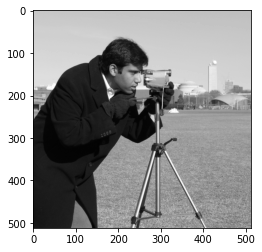

Shape of U: (512, 512)
Shape of s: (512,)
Shape of V: (512, 512)


L'errore relativo della ricostruzione di A è 0.06356538463553697
Il fattore di compressione è c= 9.24


In [14]:
A = data.camera()
# A = data.coins()


print(type(A))
print(A.shape)


plt.imshow(A, cmap='gray')
plt.show()

U, s, Vh = scipy.linalg.svd(A)
print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

A_p = np.zeros(A.shape)
p_max = 50

err_rel = np.zeros((p_max))
c = np.zeros((p_max))

for i in range(p_max):
  ui = U[:, i]
  vi = Vh[i, :]

  A_p = A_p + np.outer(ui, vi) * s[i] #somma di matrici rango 1 pesate. aggiungendo matr. di r=1 l'immagine. diventa + chiara
  
  err_rel[i] = np.linalg.norm(A_p - A) / np.linalg.norm(A)
  c[i] = min(A.shape) / (i + 1) - 1 #i + 1 perchè siamo 0-based 




print('\n')
print('L\'errore relativo della ricostruzione di A è', err_rel[-1])
print('Il fattore di compressione è c=', c[-1])

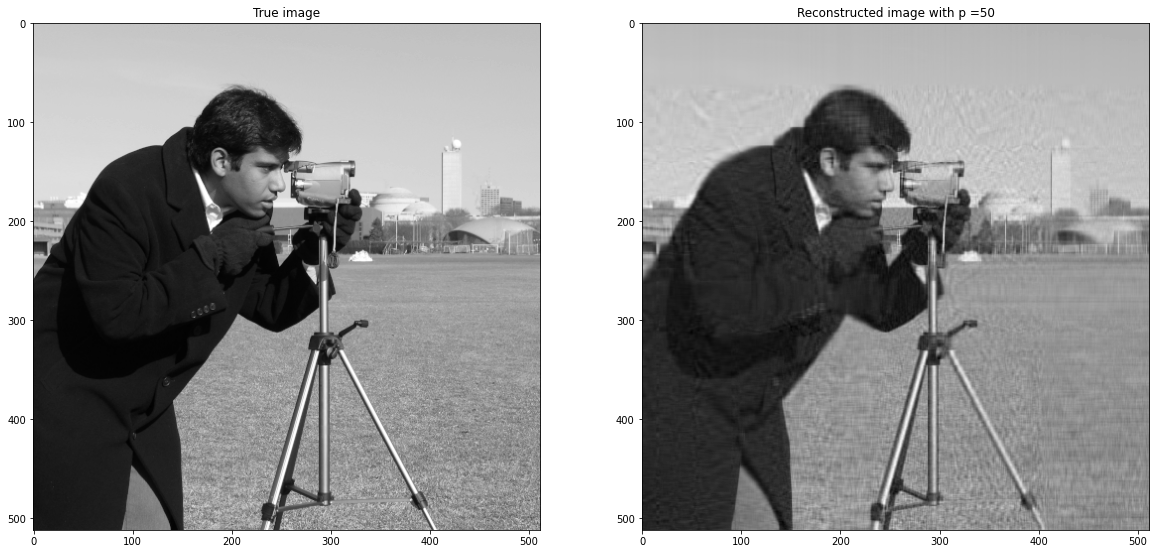

In [15]:
plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('True image')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Reconstructed image with p =' + str(p_max))

plt.show()



# al variare di p
# ....